In [3]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#from google.colab import drive
#from google.colab import files

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import pairwise_distances

from kneed import KneeLocator
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
import hdbscan

In [4]:
# Load an CSV file
file_path = 'https://www.dropbox.com/scl/fi/1jml6i3whezn5dzarkb6a/credit_card_customers.csv?rlkey=o5yjpunceaa9vo51yyudn0qw8&st=6tcl8ivy&dl=1'
data = pd.read_csv(file_path)

data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
data.describe()


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [7]:
data.info()
data.isnull().sum()
data.duplicated().sum()
data.drop_duplicates(inplace=True)
data.shape
data.columns



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

## Data Exploration

In [47]:
# Mapping nama dan task EDA
eda_tasks = {
    'diyouva': [
        "Eksplorasi lifestage (Dependent_count, Marital_Status) - distribusi dan visualisasi",
        "Statistik deskriptif untuk fitur demografis (Gender, Education_Level, Income_Category)"
    ],
    'utami': [
        "Eksplorasi fitur perilaku/behavioral (Card_Category, Attrition_Flag, Contacts_Count_12_mon)",
        "Frekuensi kategori dan visualisasi barplot untuk fitur-fitur behavioral"
    ],
    'rizaldy': [
        "Eksplorasi fitur transaksi (Total_Trans_Amt, Total_Trans_Ct, Avg_Utilization_Ratio, Credit_Limit)",
        "Statistik deskriptif dan visualisasi distribusi/boxplot untuk fitur-fitur numerik/transactional"
    ]
}

# Tampilkan mapping tugas
import pprint
print("Mapping Tugas EDA per orang:")
pprint.pprint(eda_tasks)

Mapping Tugas EDA per orang:
{'diyouva': ['Eksplorasi lifestage (Dependent_count, Marital_Status) - '
             'distribusi dan visualisasi',
             'Statistik deskriptif untuk fitur demografis (Gender, '
             'Education_Level, Income_Category)'],
 'rizaldy': ['Eksplorasi fitur transaksi (Total_Trans_Amt, Total_Trans_Ct, '
             'Avg_Utilization_Ratio, Credit_Limit)',
             'Statistik deskriptif dan visualisasi distribusi/boxplot untuk '
             'fitur-fitur numerik/transactional'],
 'utami': ['Eksplorasi fitur perilaku/behavioral (Card_Category, '
           'Attrition_Flag, Contacts_Count_12_mon)',
           'Frekuensi kategori dan visualisasi barplot untuk fitur-fitur '
           'behavioral']}


## Rizaldy - Transactional EDA

In [32]:
transactional_cols = [
    'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
    'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
    'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
]

In [33]:
# 1. Descriptive Statistics

trans_stats = data[transactional_cols].describe().T
trans_stats['median'] = data[transactional_cols].median()
trans_stats['skewness'] = data[transactional_cols].skew()
trans_stats['kurtosis'] = data[transactional_cols].kurtosis()
trans_stats['IQR'] = trans_stats['75%'] - trans_stats['25%']
trans_stats['CV'] = (trans_stats['std'] / trans_stats['mean']) * 100

trans_stats.round(3)

,count,mean,std,min,25%,50%,75%,max,median,skewness,kurtosis,IQR,CV
Credit_Limit,10127.0,8631.954,9088.777,1438.3,2555.000,4549.000,11067.500,34516.000,4549.000,1.667,1.809,8512.500,105.292
Total_Revolving_Bal,10127.0,1162.814,814.987,0.0,359.000,1276.000,1784.000,2517.000,1276.000,-0.149,-1.146,1425.000,70.088
Avg_Open_To_Buy,10127.0,7469.140,9090.685,3.0,1324.500,3474.000,9859.000,34516.000,3474.000,1.662,1.799,8534.500,121.710
Total_Amt_Chng_Q4_Q1,10127.0,0.760,0.219,0.0,0.631,0.736,0.859,3.397,0.736,1.732,9.994,0.228,28.845
Total_Trans_Amt,10127.0,4404.086,3397.129,510.0,2155.500,3899.000,4741.000,18484.000,3899.000,2.041,3.894,2585.500,77.136
Total_Trans_Ct,10127.0,64.859,23.473,10.0,45.000,67.000,81.000,139.000,67.000,0.154,-0.367,36.000,36.190
Total_Ct_Chng_Q4_Q1,10127.0,0.712,0.238,0.0,0.582,0.702,0.818,3.714,0.702,2.064,15.689,0.236,33.429
Avg_Utilization_Ratio,10127.0,0.275,0.276,0.0,0.023,0.176,0.503,0.999,0.176,0.718,-0.795,0.480,100.290


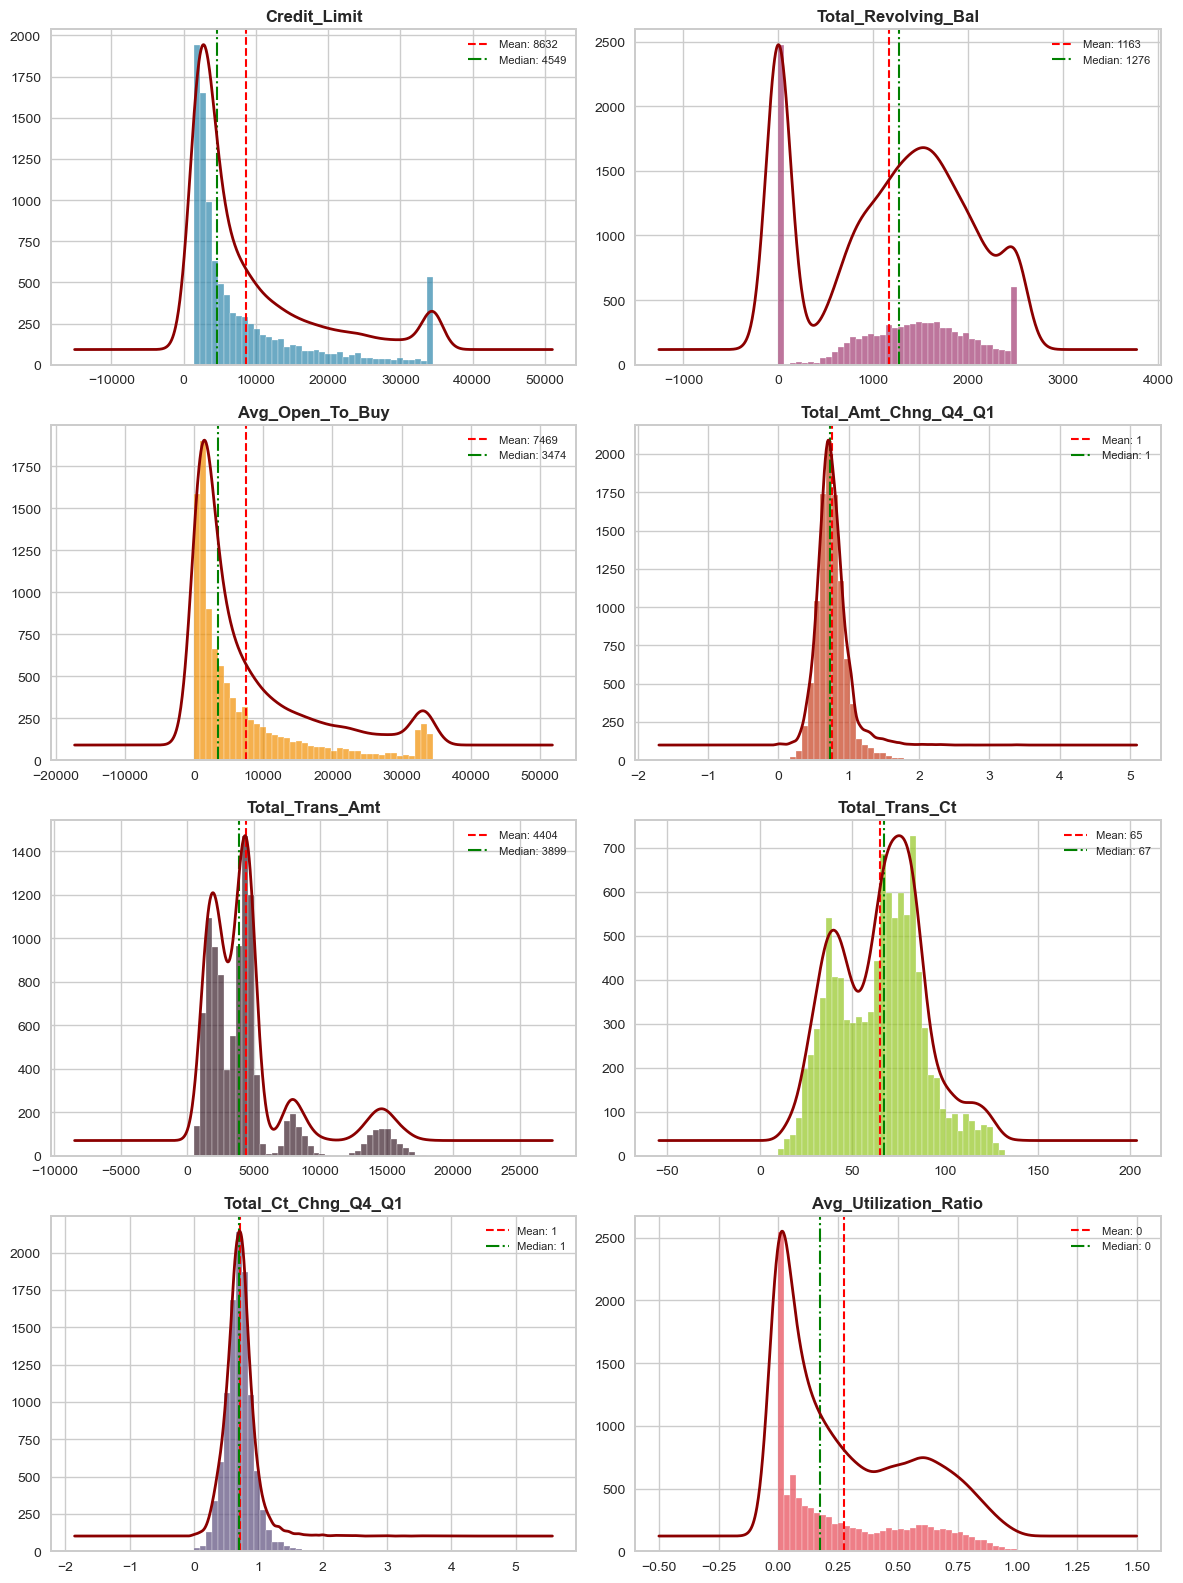

In [34]:
# 2. Distribution - Histograms with KDE

fig, axes = plt.subplots(4, 2, figsize=(12, 16))
axes = axes.flatten()
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#3B1F2B', '#95C623', '#5C4D7D', '#E84855']

for idx, col in enumerate(transactional_cols):
    ax = axes[idx]
    ax.hist(data[col], bins=40, color=colors[idx], alpha=0.7, edgecolor='white')
    ax2 = ax.twinx()
    data[col].plot(kind='kde', ax=ax2, color='darkred', linewidth=2)
    ax2.set_ylabel('')
    ax2.set_yticks([])
    
    mean_val = data[col].mean()
    median_val = data[col].median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.0f}')
    ax.axvline(median_val, color='green', linestyle='-.', linewidth=1.5, label=f'Median: {median_val:.0f}')
    ax.set_title(col, fontweight='bold')
    ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

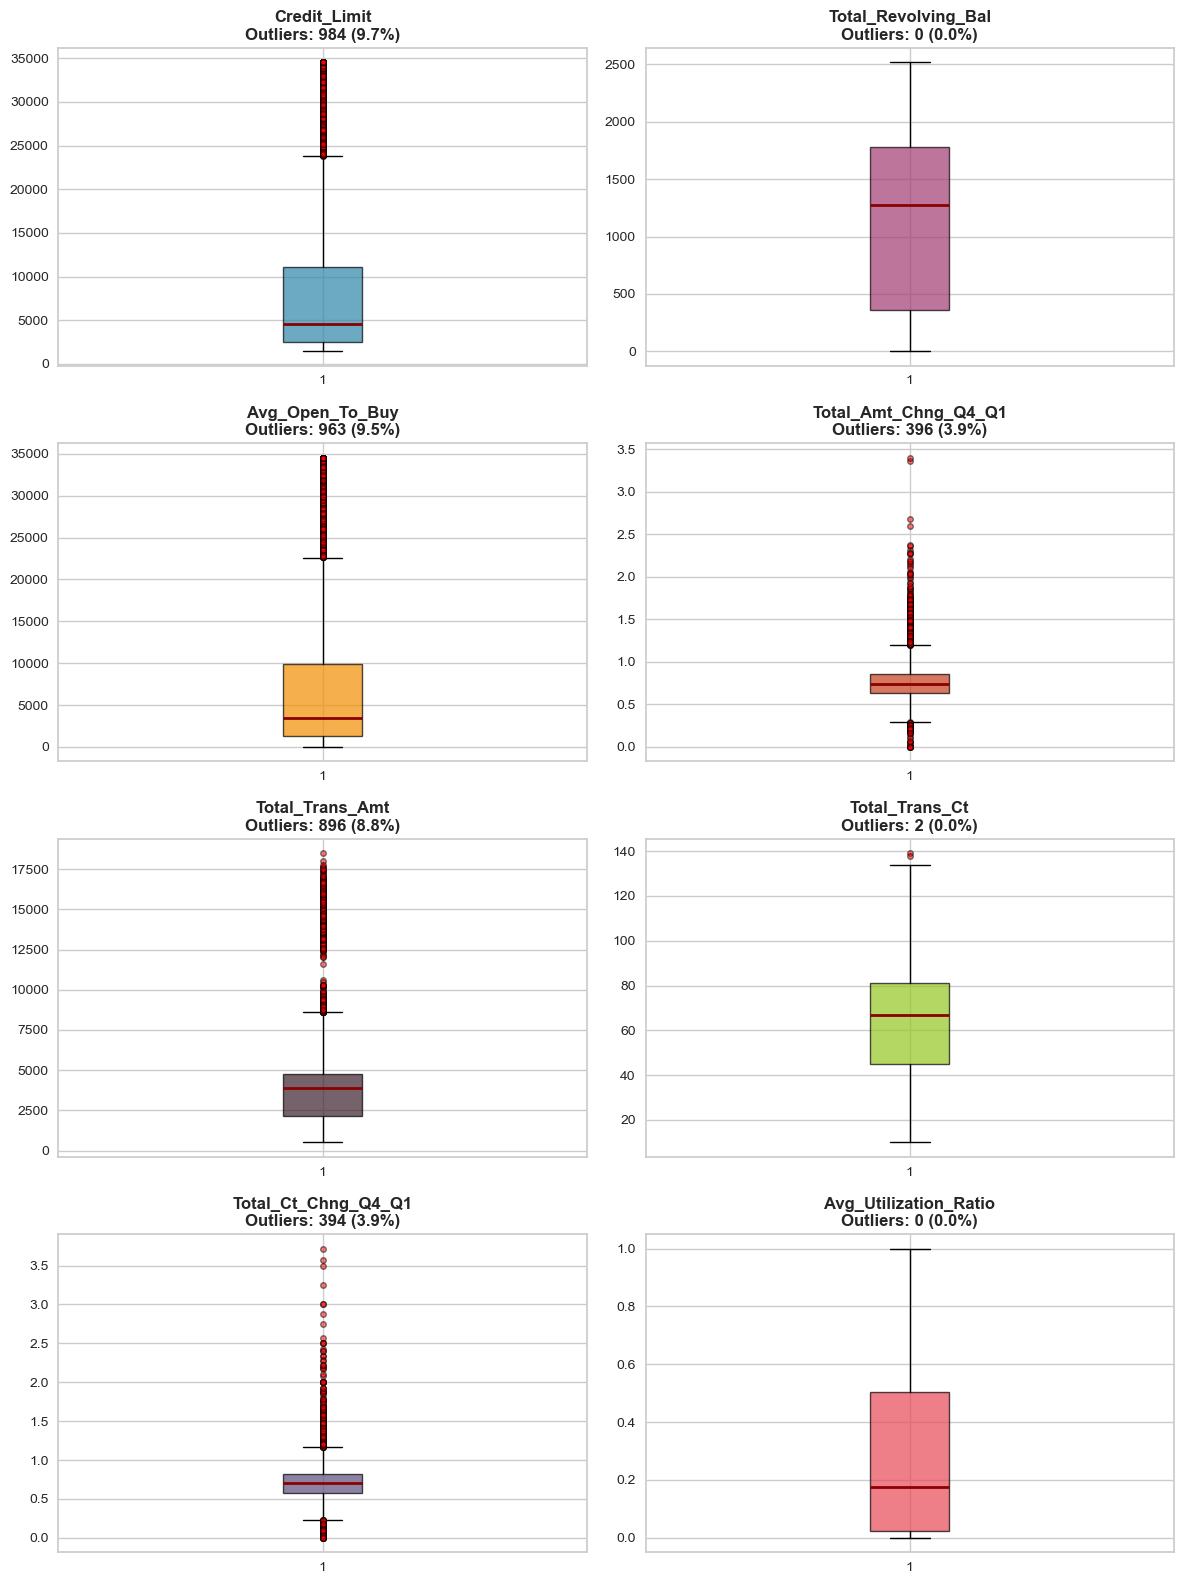

In [35]:
# 3. Boxplots - Outlier Detection

fig, axes = plt.subplots(4, 2, figsize=(12, 16))
axes = axes.flatten()
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#3B1F2B', '#95C623', '#5C4D7D', '#E84855']

for idx, col in enumerate(transactional_cols):
    ax = axes[idx]
    bp = ax.boxplot(data[col].dropna(), patch_artist=True, vert=True,
                    boxprops=dict(facecolor=colors[idx], alpha=0.7),
                    medianprops=dict(color='darkred', linewidth=2),
                    flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.5))
    
    Q1, Q3 = data[col].quantile(0.25), data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[col] < Q1 - 1.5*IQR) | (data[col] > Q3 + 1.5*IQR)][col]
    
    ax.set_title(f'{col}\nOutliers: {len(outliers)} ({len(outliers)/len(data)*100:.1f}%)', fontweight='bold')

plt.tight_layout()
plt.show()

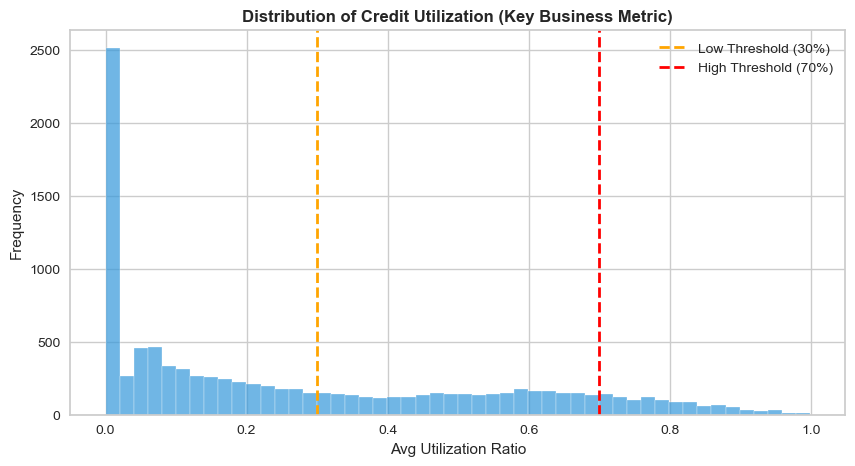

In [36]:
# 4a. Utilization Ratio - Distribution

low_util = (data['Avg_Utilization_Ratio'] <= 0.3).sum()
mid_util = ((data['Avg_Utilization_Ratio'] > 0.3) & (data['Avg_Utilization_Ratio'] <= 0.7)).sum()
high_util = (data['Avg_Utilization_Ratio'] > 0.7).sum()

plt.figure(figsize=(10, 5))
plt.hist(data['Avg_Utilization_Ratio'], bins=50, color='#3498db', alpha=0.7, edgecolor='white')
plt.axvline(0.3, color='orange', linestyle='--', linewidth=2, label='Low Threshold (30%)')
plt.axvline(0.7, color='red', linestyle='--', linewidth=2, label='High Threshold (70%)')
plt.xlabel('Avg Utilization Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Utilization (Key Business Metric)', fontweight='bold')
plt.legend()
plt.show()

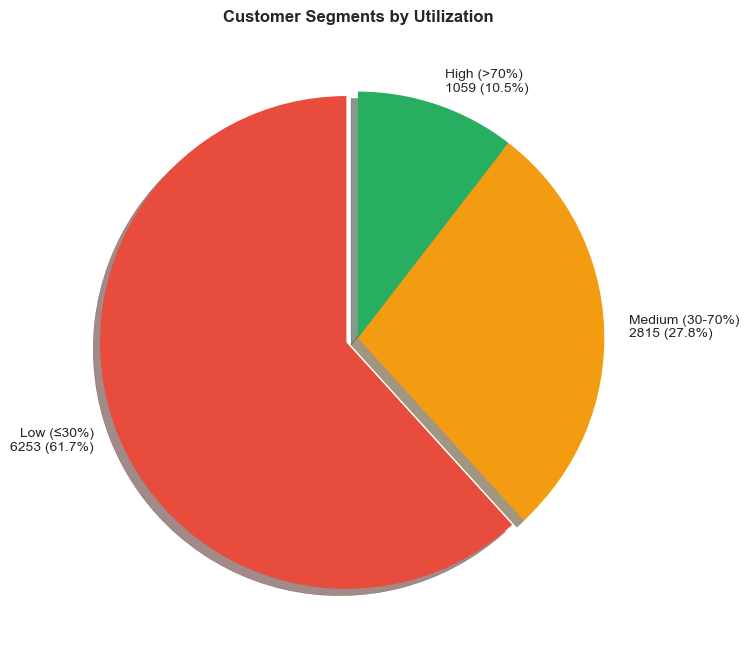

In [37]:
# 4b. Utilization Segments - Pie Chart

segments = [low_util, mid_util, high_util]
labels = [f'Low (≤30%)\n{low_util} ({low_util/len(data)*100:.1f}%)', 
          f'Medium (30-70%)\n{mid_util} ({mid_util/len(data)*100:.1f}%)', 
          f'High (>70%)\n{high_util} ({high_util/len(data)*100:.1f}%)']
colors_pie = ['#e74c3c', '#f39c12', '#27ae60']

plt.figure(figsize=(8, 8))
plt.pie(segments, labels=labels, colors=colors_pie, explode=(0.05, 0, 0), startangle=90, shadow=True)
plt.title('Customer Segments by Utilization', fontweight='bold')
plt.show()

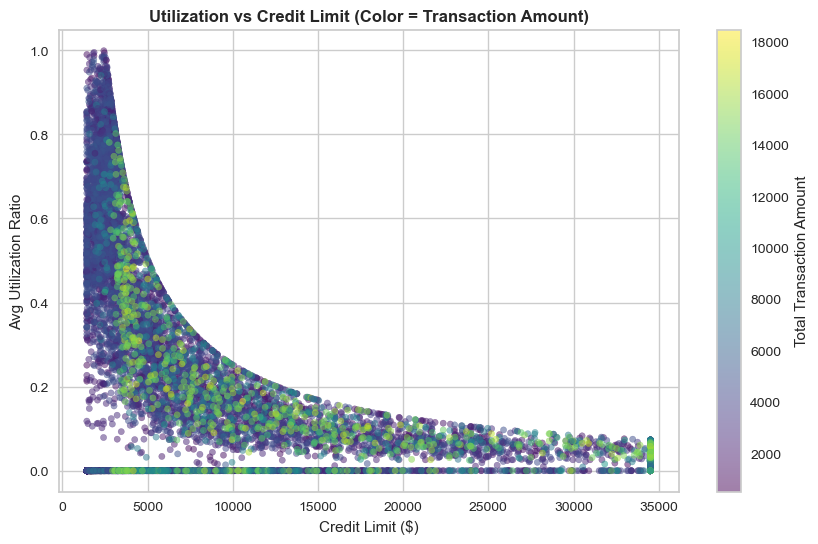

In [38]:
# 4c. Utilization vs Credit Limit

plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['Credit_Limit'], data['Avg_Utilization_Ratio'], 
                      c=data['Total_Trans_Amt'], cmap='viridis', alpha=0.5, s=20)
plt.xlabel('Credit Limit ($)')
plt.ylabel('Avg Utilization Ratio')
plt.title('Utilization vs Credit Limit (Color = Transaction Amount)', fontweight='bold')
plt.colorbar(scatter, label='Total Transaction Amount')
plt.show()

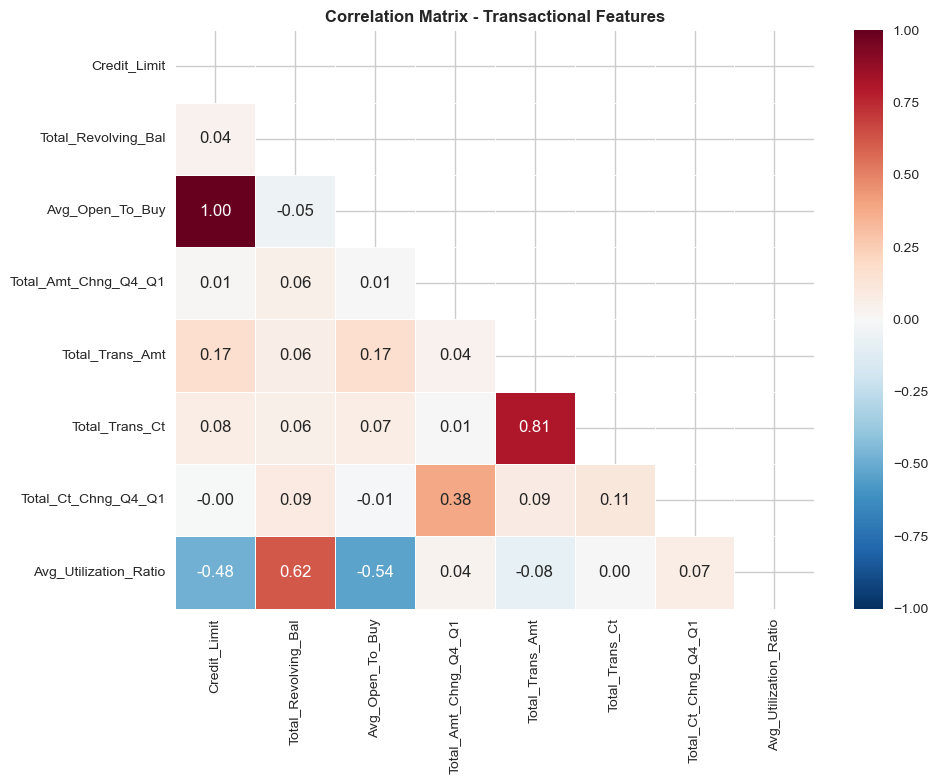

In [39]:
# 5a. Correlation Heatmap

corr_matrix = data[transactional_cols].corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix - Transactional Features', fontweight='bold')
plt.tight_layout()
plt.show()

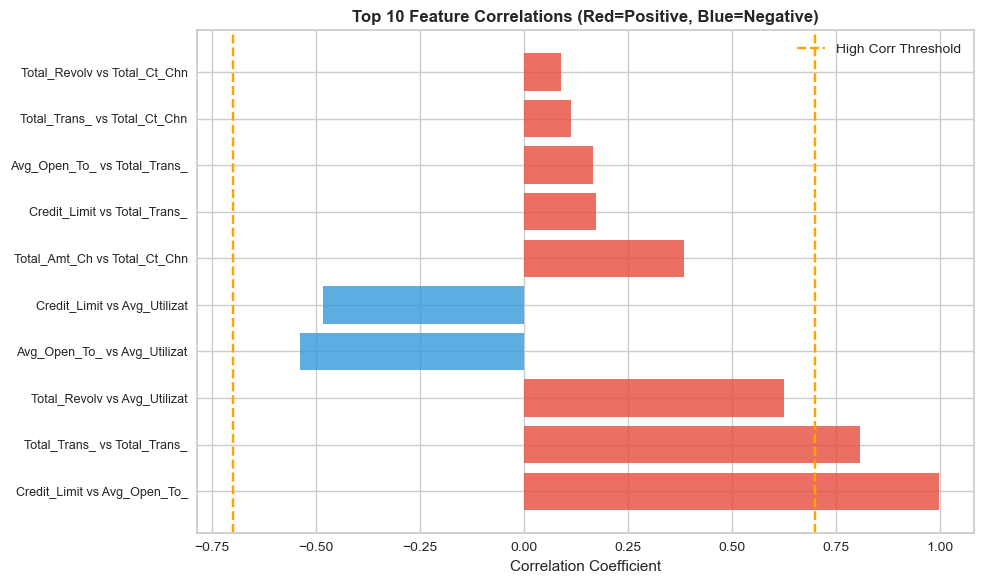

In [40]:
# 5b. Top 10 Feature Correlations

corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_pairs.append({
            'Pair': f'{corr_matrix.columns[i][:12]} vs {corr_matrix.columns[j][:12]}',
            'Correlation': corr_matrix.iloc[i, j]
        })

corr_pairs_df = pd.DataFrame(corr_pairs)
corr_pairs_df = corr_pairs_df.reindex(corr_pairs_df['Correlation'].abs().sort_values(ascending=False).index)
top_corrs = corr_pairs_df.head(10)

plt.figure(figsize=(10, 6))
colors_bar = ['#e74c3c' if x > 0 else '#3498db' for x in top_corrs['Correlation']]
plt.barh(range(len(top_corrs)), top_corrs['Correlation'], color=colors_bar, alpha=0.8)
plt.yticks(range(len(top_corrs)), top_corrs['Pair'], fontsize=9)
plt.xlabel('Correlation Coefficient')
plt.title('Top 10 Feature Correlations (Red=Positive, Blue=Negative)', fontweight='bold')
plt.axvline(0.7, color='orange', linestyle='--', label='High Corr Threshold')
plt.axvline(-0.7, color='orange', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

# Key finding: Credit_Limit & Avg_Open_To_Buy highly correlated (0.99) - use only one

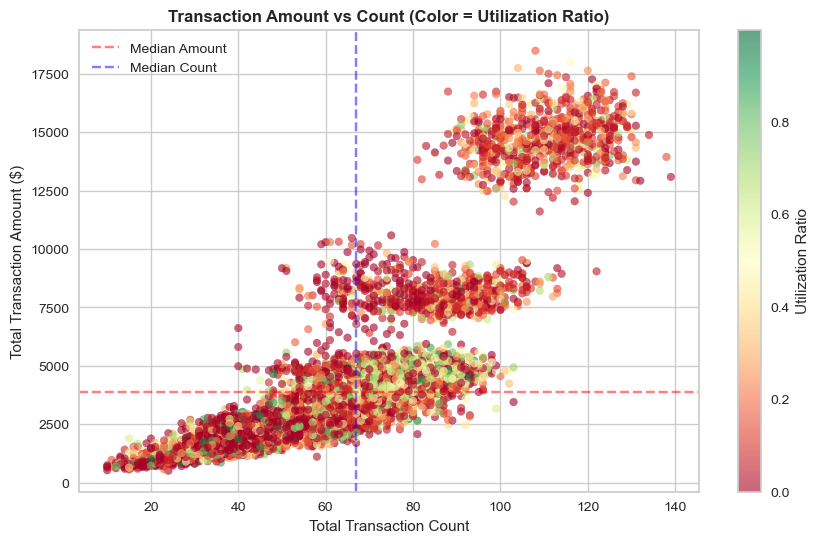

In [41]:
# 6a. Transaction Amount vs Count Scatter

plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['Total_Trans_Ct'], data['Total_Trans_Amt'], 
                      c=data['Avg_Utilization_Ratio'], cmap='RdYlGn', alpha=0.6, s=30)
plt.axhline(data['Total_Trans_Amt'].median(), color='red', linestyle='--', alpha=0.5, label='Median Amount')
plt.axvline(data['Total_Trans_Ct'].median(), color='blue', linestyle='--', alpha=0.5, label='Median Count')
plt.xlabel('Total Transaction Count')
plt.ylabel('Total Transaction Amount ($)')
plt.title('Transaction Amount vs Count (Color = Utilization Ratio)', fontweight='bold')
plt.colorbar(scatter, label='Utilization Ratio')
plt.legend()
plt.show()

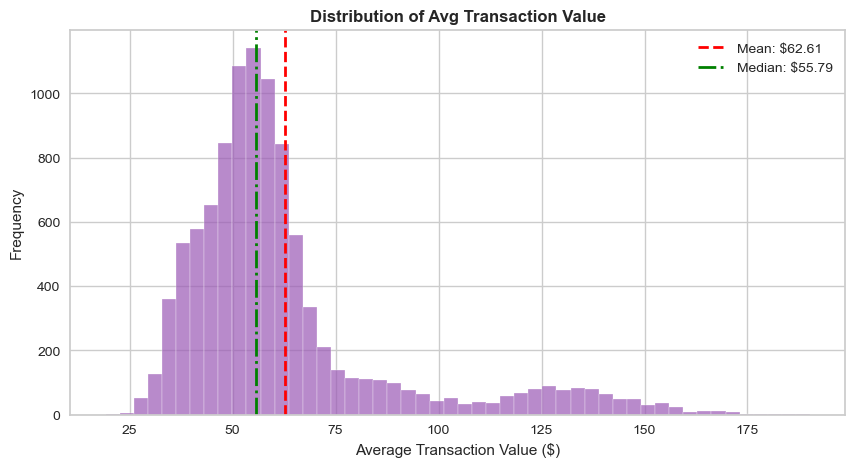

In [42]:
# 6b. Average Transaction Value Distribution

data['Avg_Trans_Value'] = data['Total_Trans_Amt'] / data['Total_Trans_Ct']

plt.figure(figsize=(10, 5))
plt.hist(data['Avg_Trans_Value'], bins=50, color='#9b59b6', alpha=0.7, edgecolor='white')
plt.axvline(data['Avg_Trans_Value'].mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Mean: ${data["Avg_Trans_Value"].mean():.2f}')
plt.axvline(data['Avg_Trans_Value'].median(), color='green', linestyle='-.', linewidth=2, 
            label=f'Median: ${data["Avg_Trans_Value"].median():.2f}')
plt.xlabel('Average Transaction Value ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Avg Transaction Value', fontweight='bold')
plt.legend()
plt.show()

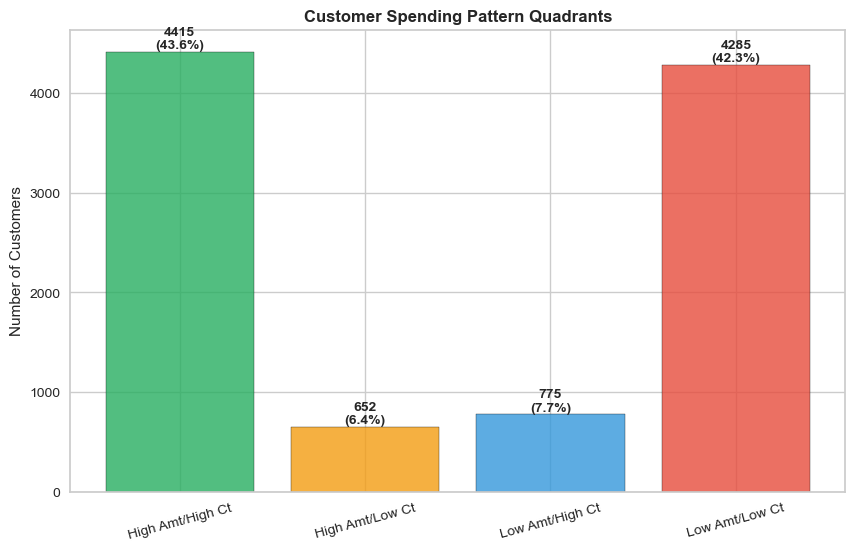

In [43]:
# 6c. Customer Spending Pattern Quadrants

high_amt = data['Total_Trans_Amt'] >= data['Total_Trans_Amt'].median()
high_ct = data['Total_Trans_Ct'] >= data['Total_Trans_Ct'].median()

quadrants = pd.DataFrame({
    'Quadrant': ['High Amt/High Ct', 'High Amt/Low Ct', 'Low Amt/High Ct', 'Low Amt/Low Ct'],
    'Count': [(high_amt & high_ct).sum(), (high_amt & ~high_ct).sum(), 
              (~high_amt & high_ct).sum(), (~high_amt & ~high_ct).sum()],
    'Color': ['#27ae60', '#f39c12', '#3498db', '#e74c3c']
})

plt.figure(figsize=(10, 6))
bars = plt.bar(quadrants['Quadrant'], quadrants['Count'], color=quadrants['Color'], alpha=0.8, edgecolor='black')
for bar, count in zip(bars, quadrants['Count']):
    plt.annotate(f'{count}\n({count/len(data)*100:.1f}%)', 
                 xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                 ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.ylabel('Number of Customers')
plt.title('Customer Spending Pattern Quadrants', fontweight='bold')
plt.xticks(rotation=15)
plt.show()

# Green=Power users, Orange=Big spenders, Blue=Frequent users, Red=Low engagement (target)

Feature Selection Summary
              Feature  Corr_Target  Score Include
Avg_Utilization_Ratio        1.000 10.000     YES
         Credit_Limit        0.483  7.414     YES
  Total_Revolving_Bal        0.624  5.144     YES
      Total_Trans_Amt        0.083  2.834     YES
  Total_Ct_Chng_Q4_Q1        0.074  2.371      NO
 Total_Amt_Chng_Q4_Q1        0.035  2.176      NO
       Total_Trans_Ct        0.003  2.014      NO
      Avg_Open_To_Buy        0.539  0.000      NO


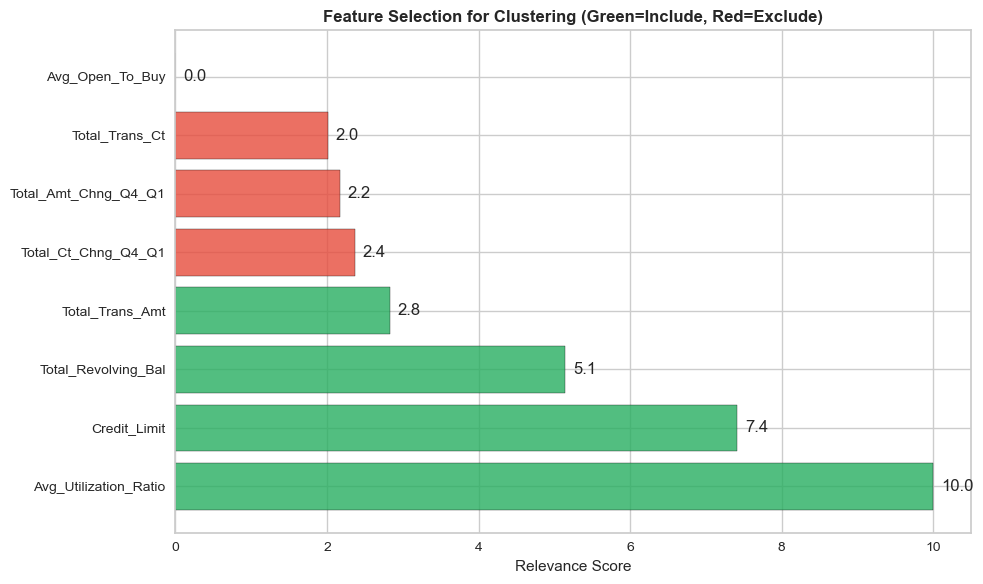


SELECTED (4): Credit_Limit, Avg_Utilization_Ratio, Total_Revolving_Bal, Total_Trans_Amt
Excluded: Avg_Open_To_Buy (redundant with Credit_Limit)


In [46]:
# 7. Feature Selection - Automatic Scoring

# Score based on: Correlation with target (50%) + Variance (30%) + base (20%)
feature_cols = [c for c in transactional_cols if c != 'Avg_Utilization_Ratio']
corr_with_target = corr_matrix['Avg_Utilization_Ratio'].drop('Avg_Utilization_Ratio').abs()

# Normalized variance
variance = data[feature_cols].var()
norm_variance = (variance - variance.min()) / (variance.max() - variance.min())

# Calculate score
scores = (corr_with_target * 0.5 + norm_variance * 0.3 + 0.2) * 10
scores['Avg_Utilization_Ratio'] = 10

# Mark redundant (Avg_Open_To_Buy = Credit_Limit - Total_Revolving_Bal)
redundant = ['Avg_Open_To_Buy']
scores[redundant] = 0

# Build dataframe
feature_df = pd.DataFrame({
    'Feature': transactional_cols,
    'Corr_Target': [corr_with_target.get(c, 1.0) for c in transactional_cols],
    'Score': [scores.get(c, 10) for c in transactional_cols]
}).sort_values('Score', ascending=False)

# Select features: must include Credit_Limit (capacity) + top scorers + business metric
must_include = ['Credit_Limit', 'Avg_Utilization_Ratio']
other_candidates = feature_df[~feature_df['Feature'].isin(must_include + redundant)].head(2)['Feature'].tolist()
selected = must_include + other_candidates

feature_df['Include'] = feature_df['Feature'].apply(lambda x: 'YES' if x in selected else 'NO')

print("Feature Selection Summary")
print(feature_df[['Feature', 'Corr_Target', 'Score', 'Include']].round(3).to_string(index=False))

# Visualization
plt.figure(figsize=(10, 6))
colors = ['#27ae60' if inc == 'YES' else '#e74c3c' for inc in feature_df['Include']]
bars = plt.barh(feature_df['Feature'], feature_df['Score'], color=colors, alpha=0.8, edgecolor='black')
plt.xlabel('Relevance Score')
plt.title('Feature Selection for Clustering (Green=Include, Red=Exclude)', fontweight='bold')
for bar, score in zip(bars, feature_df['Score']):
    plt.annotate(f'{score:.1f}', xy=(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2), va='center')
plt.tight_layout()
plt.show()

print(f"\nSELECTED ({len(selected)}): {', '.join(selected)}")
print("Excluded: Avg_Open_To_Buy (redundant with Credit_Limit)")

## Utami - Behavioral EDA

In [ ]:
#Compute churn rate and retention rate
attrition_counts = data["Attrition_Flag"].value_counts()
attrition_counts

total_customers = len(data)

num_attrited = attrition_counts.get("Attrited Customer", 0)
num_existing = attrition_counts.get("Existing Customer", 0)

churn_rate = num_attrited / total_customers
retention_rate = num_existing / total_customers

print(f"Annual churn rate: {churn_rate:.3%}")
print(f"Annual retention rate: {retention_rate:.3%}")

In [ ]:
# Drop ID and outcome variable for clustering EDA
df_eda = data.drop(columns=["CLIENTNUM", "Attrition_Flag"], errors="ignore")

# Numeric vs categorical
num_cols = df_eda.select_dtypes(include=np.number).columns.tolist()
cat_cols = [c for c in df_eda.columns if c not in num_cols]

print("Numeric columns:", len(num_cols))
print(num_cols)
print("\nCategorical columns:", len(cat_cols))
print(cat_cols)

#check any missing value
df_eda.isna().any().any()

#statistic
num_cols = df_eda.select_dtypes(include=np.number).columns.tolist()

df_eda[num_cols].describe().T

In [ ]:
import math

#relationship on card category to their spending behaviour
card_order = ["Blue", "Silver", "Gold", "Platinum"]
key_numeric = [
    "Avg_Utilization_Ratio",
    "Total_Trans_Amt",
    "Total_Trans_Ct",
    "Total_Revolving_Bal",
    "Total_Amt_Chng_Q4_Q1",
    "Total_Ct_Chng_Q4_Q1",
]

key_numeric = [c for c in key_numeric if c in df_eda.columns]

# Convert 'Card_Category' to a Categorical type with the specified order
df_eda['Card_Category'] = pd.Categorical(df_eda['Card_Category'], categories=card_order, ordered=True)

df_eda.groupby("Card_Category")[key_numeric].mean().round(2)

In [ ]:
n_cols = 3                      # how many plots per row
n_rows = math.ceil(len(key_numeric) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(key_numeric):
    sns.boxplot(
        x="Card_Category",
        y=col,
        data=df_eda,
        ax=axes[i]
    )
    axes[i].set_title(f"{col} by Card Category")
    axes[i].set_xlabel("Card Category")
    axes[i].set_ylabel(col)

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

This EDA indicates some card category overlapping and outlier

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(key_numeric):
    sns.histplot(df_eda[col], bins=40, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

In [ ]:
sns.pairplot(
    df_eda[key_numeric],
    corner=True,
    plot_kws={"alpha": 0.3, "s": 10}
)
plt.show()

### Analysis on Behaviour compared to the revenue driver:
1. Credit Utilization Behaviour & Interest Potential
Key feature : avg_utilization ratio & revolving balance
The plots comparing Revolving balance vs Average Utilization Ratio exhibits a clear triangular or wedge-shaped structure rather than a linear trend. Revolving balances are bounded by a customer's credit limit and therefore increase mechanically with utilization. Customers with high utilization ratios are operating close to their credit limits and are more likely to carry persistent balances, generating interest revenue but also indicating elevated financial stress.

2. Spending Behaviour
Key Feature:
a) Total_trans_amt & Total_trans_ct --> signalling 3 clusters
b) Revolving balance & Total trans_amt --> the figure shows vertical bands and substantial dispersion, indicating that customers with similar transaction volumes can have very different revolving balances. Many customers with high transaction amounts carry little or no revolving balance, while others accumulate substantial balances despite moderate transaction activity.

### Analysis on Engagement & Relationship Behaviour

In [ ]:
if "Months_Inactive_12_mon" in df_eda.columns:
    plt.figure()
    sns.scatterplot(x=df_eda["Months_Inactive_12_mon"], y=df_eda["Total_Trans_Ct"], alpha=0.3)
    plt.title("Months Inactive vs Transaction Count")
    plt.xlabel("Months_Inactive_12_mon")
    plt.ylabel("Total_Trans_Ct")
    plt.show()

There is a clear negative association - as months inactive increase, the typical transaction count decreases.

The scatterplot of months inactive versus transaction count shows a clear decline in transaction activity as inactivity increases, with substantial heterogeneity within each inactivity level.

There is also a ratio called "Contact-to-Inactivity Ratio": Contacts_ct_12_mon / months_inactive_12_mon.

Variables: Total_Amt_Chng_Q4_Q1 and Total_Ct_Chng_Q4_Q1 are also often used to test the engagement level of customer compared to the previous term.

# Business Objective Derived

**Business Goal:** Increase Utilization Rate → Drive sales volume and revenue

**Strategy:** Cluster customers by Life Stage, identify under-utilized segments, then target with specific offers

**Example:** Find "Families with low credit usage" → Design product offers to encourage higher utilization

## Data Preprocesssing

=== Data Quality Check ===
Shape: (10127, 4)
Missing values: 0
Duplicates: 0
Inf values: 0
Data is CLEAN!


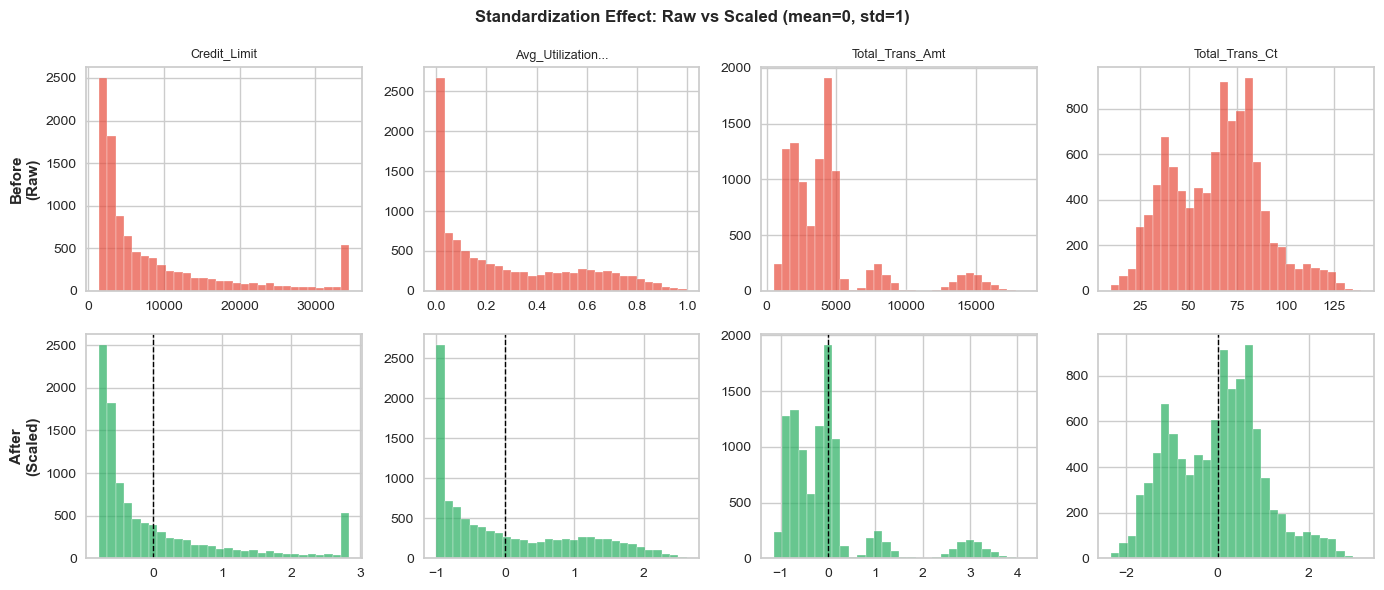


Scaled stats:
      Credit_Limit  Avg_Utilization_Ratio  Total_Trans_Amt  Total_Trans_Ct
mean           0.0                   -0.0             -0.0            -0.0
std            1.0                    1.0              1.0             1.0


In [26]:
# Transactional features preprocessing (Rizaldy)
selected_trans_fea = ['Credit_Limit', 'Avg_Utilization_Ratio', 'Total_Trans_Amt', 'Total_Trans_Ct']

# Data quality check
X_trans = data[selected_trans_fea].copy()
print("=== Data Quality Check ===")
print(f"Shape: {X_trans.shape}")
print(f"Missing values: {X_trans.isnull().sum().sum()}")
print(f"Duplicates: {X_trans.duplicated().sum()}")
print(f"Inf values: {np.isinf(X_trans).sum().sum()}")
print("Data is CLEAN!" if X_trans.isnull().sum().sum() == 0 else "WARNING: Has missing values!")

# Standardize
scaler_trans = StandardScaler()
X_trans_scaled = scaler_trans.fit_transform(X_trans)
X_trans_scaled = pd.DataFrame(X_trans_scaled, columns=selected_trans_fea)

# Visualization: Before vs After scaling
fig, axes = plt.subplots(2, 4, figsize=(14, 6))

for idx, col in enumerate(selected_trans_fea):
    # Before (raw)
    axes[0, idx].hist(X_trans[col], bins=30, color='#e74c3c', alpha=0.7, edgecolor='white')
    axes[0, idx].set_title(f'{col[:15]}...' if len(col) > 15 else col, fontsize=9)
    if idx == 0:
        axes[0, idx].set_ylabel('Before\n(Raw)', fontweight='bold')
    
    # After (scaled)
    axes[1, idx].hist(X_trans_scaled[col], bins=30, color='#27ae60', alpha=0.7, edgecolor='white')
    axes[1, idx].axvline(0, color='black', linestyle='--', linewidth=1)
    if idx == 0:
        axes[1, idx].set_ylabel('After\n(Scaled)', fontweight='bold')

plt.suptitle('Standardization Effect: Raw vs Scaled (mean=0, std=1)', fontweight='bold', fontsize=12)
plt.tight_layout()
plt.show()

print(f"\nScaled stats:")
print(X_trans_scaled.describe().loc[['mean', 'std']].round(3))

In [ ]:
# Behavioral features preprocessing (Utami)
# Engineer avg_transaction_value safely (handle division by zero)
df_behav = data.copy()
df_behav["avg_transaction_value"] = np.where(
    df_behav["Total_Trans_Ct"] == 0,
    0,
    df_behav["Total_Trans_Amt"] / df_behav["Total_Trans_Ct"]
)

# Selected behavioral features based on EDA insights
selected_behav_fea = [
    "Total_Revolving_Bal",
    "Avg_Utilization_Ratio",
    "avg_transaction_value"
]

# Data quality check
X_behav = df_behav[selected_behav_fea].copy()
print("=== Behavioral Features - Data Quality Check ===")
print(f"Shape: {X_behav.shape}")
print(f"Missing values: {X_behav.isnull().sum().sum()}")
print(f"Duplicates: {X_behav.duplicated().sum()}")
print(f"Inf values: {np.isinf(X_behav).sum().sum()}")

# Basic cleaning
X_behav = X_behav.replace([np.inf, -np.inf], np.nan)
X_behav = X_behav.fillna(X_behav.median(numeric_only=True))
print("Data is CLEAN!" if X_behav.isnull().sum().sum() == 0 else "WARNING: Has missing values!")

# Standardize (critical for K-Means)
scaler_behav = StandardScaler()
X_behav_scaled = scaler_behav.fit_transform(X_behav)
X_behav_scaled = pd.DataFrame(X_behav_scaled, columns=selected_behav_fea)

# Visualization: Before vs After scaling
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

for idx, col in enumerate(selected_behav_fea):
    # Before (raw)
    axes[0, idx].hist(X_behav[col], bins=30, color='#3498db', alpha=0.7, edgecolor='white')
    axes[0, idx].set_title(col, fontsize=9)
    if idx == 0:
        axes[0, idx].set_ylabel('Before\n(Raw)', fontweight='bold')
    
    # After (scaled)
    axes[1, idx].hist(X_behav_scaled[col], bins=30, color='#9b59b6', alpha=0.7, edgecolor='white')
    axes[1, idx].axvline(0, color='black', linestyle='--', linewidth=1)
    if idx == 0:
        axes[1, idx].set_ylabel('After\n(Scaled)', fontweight='bold')

plt.suptitle('Behavioral Features: Raw vs Scaled (mean=0, std=1)', fontweight='bold', fontsize=12)
plt.tight_layout()
plt.show()

print(f"\nScaled stats:")
print(X_behav_scaled.describe().loc[['mean', 'std']].round(3))

In [ ]:
# Engagement features preprocessing (Utami) - for churn risk detection
# Engineer contact-to-inactivity ratio (safe for zero inactivity)
df_engage = data.copy()
df_engage["contact_inactivity_ratio"] = (
    df_engage["Contacts_Count_12_mon"] /
    (df_engage["Months_Inactive_12_mon"] + 1)  # +1 to avoid division by zero
)

# Selected engagement features based on EDA insights
selected_engage_fea = [
    "contact_inactivity_ratio",
    "Total_Amt_Chng_Q4_Q1",
    "Total_Ct_Chng_Q4_Q1",
    "Avg_Utilization_Ratio"
]

# Data quality check
X_engage = df_engage[selected_engage_fea].copy()
print("=== Engagement Features - Data Quality Check ===")
print(f"Shape: {X_engage.shape}")
print(f"Missing values: {X_engage.isnull().sum().sum()}")
print(f"Duplicates: {X_engage.duplicated().sum()}")
print(f"Inf values: {np.isinf(X_engage).sum().sum()}")

# Basic cleaning
X_engage = X_engage.replace([np.inf, -np.inf], np.nan)
X_engage = X_engage.fillna(X_engage.median(numeric_only=True))
print("Data is CLEAN!" if X_engage.isnull().sum().sum() == 0 else "WARNING: Has missing values!")

# Standardize
scaler_engage = StandardScaler()
X_engage_scaled = scaler_engage.fit_transform(X_engage)
X_engage_scaled = pd.DataFrame(X_engage_scaled, columns=selected_engage_fea)

# Visualization: Before vs After scaling
fig, axes = plt.subplots(2, 4, figsize=(14, 6))

for idx, col in enumerate(selected_engage_fea):
    # Before (raw)
    axes[0, idx].hist(X_engage[col], bins=30, color='#e67e22', alpha=0.7, edgecolor='white')
    axes[0, idx].set_title(col[:18] + '...' if len(col) > 18 else col, fontsize=9)
    if idx == 0:
        axes[0, idx].set_ylabel('Before\n(Raw)', fontweight='bold')
    
    # After (scaled)
    axes[1, idx].hist(X_engage_scaled[col], bins=30, color='#16a085', alpha=0.7, edgecolor='white')
    axes[1, idx].axvline(0, color='black', linestyle='--', linewidth=1)
    if idx == 0:
        axes[1, idx].set_ylabel('After\n(Scaled)', fontweight='bold')

plt.suptitle('Engagement Features: Raw vs Scaled (mean=0, std=1)', fontweight='bold', fontsize=12)
plt.tight_layout()
plt.show()

print(f"\nScaled stats:")
print(X_engage_scaled.describe().loc[['mean', 'std']].round(3))

In [ ]:
# Summary: Available Feature Sets for Clustering
print("=" * 60)
print("PREPROCESSED FEATURE SETS READY FOR CLUSTERING")
print("=" * 60)

print("\n1. TRANSACTIONAL Features (Rizaldy):")
print(f"   Variables: {selected_trans_fea}")
print(f"   Scaled data: X_trans_scaled ({X_trans_scaled.shape})")

print("\n2. BEHAVIORAL Features (Utami):")
print(f"   Variables: {selected_behav_fea}")
print(f"   Scaled data: X_behav_scaled ({X_behav_scaled.shape})")
print("   Note: Includes engineered 'avg_transaction_value' feature")

print("\n3. ENGAGEMENT Features (Utami) - for churn risk:")
print(f"   Variables: {selected_engage_fea}")
print(f"   Scaled data: X_engage_scaled ({X_engage_scaled.shape})")
print("   Note: Includes engineered 'contact_inactivity_ratio' feature")

print("\n" + "=" * 60)

## K-Means Clustering

## Hierarchical Clustering

## DBSCAN

In [ ]:
data.to_csv('clustered_data.csv', index=False)
files.download('clustered_data.csv')